# Fundamentals of Data Analysis Assessment 2019 - Tips Dataset 

## Introduction 
In the US, the tip rate for restaurants with table service is 15% or more of the bill, based on the quality of service. If you receive exceptional service, 20-25% is customary[8]. Tips in restaurants are influenced by many factors including type of restaurant, quality of food and most importantly service.  One waiter recorded 244 tips and several variables over a 2.5 month period working in one restaurant. The restaurant located in a suburban shopping mall, was one of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. The data was assigned to those days and during those times when the food server was routinely assigned to work [10].  The data was reported in a collection of case studies for business statistics [9]. 

Is it possible to isolate the criteria that govern tip rate and increase tips for the waiter? This project interrogates the tips [6] dataset and utilises Python [1] packages, seaborn [5] and jupyter [4] to analyse if a variable can be isolated and then actioned to infuence tip %. 

## Import libraries

In [1]:
# Import numpy, matplotlib, seaborn and pandas
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd

In [2]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline
# Apply the default seaborn settings
sns.set()

## Raw Data

In [3]:
# Import tips dataset and call it tips
tips = sns.load_dataset("tips")

### Format of the dataset

The below commnd (tips.info) summarises the dataset.  It comprises 244 rows and 7 columns.  

4 columns are categories/objects:
 - sex - Male/Female
 - smoker - Yes or No
 - day - Thursday through to Sunday
 - time - lunch or dinner
 
3 columns are numeric:
 - total_bill (float)
 - tip (float)
 - size (integer)

In [4]:
# Summarise the Dataframe
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
# Visually view the dataset
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Descriptive statistics

In [6]:
# Describe the dataset using pandas describe()
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Observations of the dataset

 - All groups paid a tip
 - The average bill is 19.79  
 - The average tip is 3.00 or 15.2%
 - Minimum tip is 1.00 
 - Maximum tip is 10.0
 - Average party size is 2.5

The restaurant appears to be inexpensive with an average bill of 19.79.  Therefore the key to higher revenue and tips is throughput i.e. customer numbers.  Average tip is 15.2 % which is representative of the cultural expectation of 15%.  The scattergraph below also demonstrates correlation visually.  

However we need to dig a bit deeper to investigate if there are any underlying trends or dynamics that are influencing the tip received. 

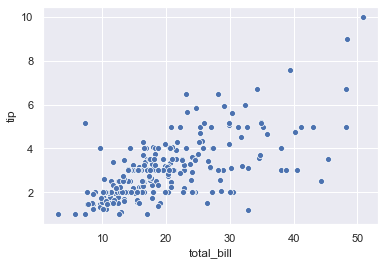

In [7]:
# Plot the data (total bill vs tip)
sns.scatterplot(x='total_bill',y='tip',data=tips)

#### Add variable - tip target
 The first step towards testing the relationship requires that a target is added to highlight if customers are paying as expected.

In [8]:
# Create a  new variable - tip target %
tips["tip_t"] = tips["total_bill"] * .15

Plot a scatterplot to include a linear regression model (and its uncertainty) using regplot()

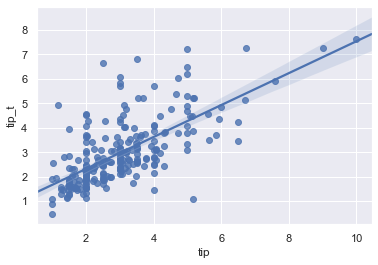

In [9]:
# Plot a scatterplot to include a linear regression model (and its uncertainty) using reglot()
# Modified from https://seaborn.pydata.org/introduction.html
sns.regplot(x="tip", y="tip_t", data=tips)

As you can see values are clustered around the 15% meaning that customers view it as a target or guideline and then decide given their experience what amount they should leave as a tip.  There are a few tips that are out of sync with the rest of the population but this could be viewed as outliers.

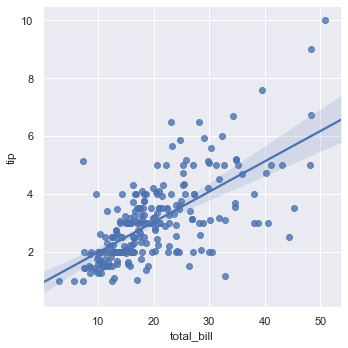

In [19]:
# Plot a scatterplot to include a linear regression model (and its uncertainty) using lmplot()
# Modified from https://seaborn.pydata.org/introduction.html
sns.lmplot(x="total_bill", y="tip", data=tips)

## Regression

Regression analysis is a way of mathematically sorting out which variables have an impact[11].  The initial analysis above demonstrates that there is a clear correlation between total bill and tip amount. As a result this allows underlying relationships to be investigated.   Tipping is ingrained into the American culture and that is displayed above as all customers paid a tip.  However are tips paid on a straight line basis i.e. in the majority of cases customer paid in or around 15% or are there swings?   

### Slice the Data by  Day and Time
Pandas[7] groupby function is used to slice the data.

 - Thursday is the busiest day for lunch with 61 groups served.  
 - Only 7 groups had lunch on Friday. 
 - No one was served lunch Saturday or Sunday.
 - Thursday dinner only had one group.  
 - Saturday and Sunday are the busiest times for dinner. 

In [11]:
# Split the data by day and time using groupby.
tips.groupby(['time', 'day']).size()

time    day 
Lunch   Thur    61
        Fri      7
Dinner  Thur     1
        Fri     12
        Sat     87
        Sun     76
dtype: int64

Let's see if the tip  amounts correlate i.e Thursday lunch and Saturday and Sunday dinner time produce the highest tips.
### Slice the Data by  Day and Time
Pandas[7] groupby function is used to slice the data.

 - 168.83 received in tips on Thurday lunchtime versus a target of 161.63.  
 - 260.40 and 247.39 received for Saturday and Sunday dinner versus targets of 266.76 and 244.07 respectively.
 
 - No one was served lunch Saturday or Sunday meaning the server received no tips. This is very odd given that weekends should be the busiest time for restaurants.  It would seem that the restaurant is not attractive to young families or teenagers who would tend to go on outings at the weekend in particular at lunch.

In [12]:
tips.groupby(['day', 'time']).sum()

total_bill     tip   size     tip_t
day  time                                       
Thur Lunch      1077.55  168.83  150.0  161.6325
     Dinner       18.78    3.00    2.0    2.8170
Fri  Lunch        89.92   16.68   14.0   13.4880
     Dinner      235.96   35.28   26.0   35.3940
Sat  Lunch          NaN     NaN    NaN       NaN
     Dinner     1778.40  260.40  219.0  266.7600
Sun  Lunch          NaN     NaN    NaN       NaN
     Dinner     1627.16  247.39  216.0  244.0740

### Slice the Data by Gender and Smoker status
Using Pandas[7] groupby function to slice the data by gender and smoker status.  
- The highest tips received were from male non smokers.  
- The second highest tips were from male smokers.
- The third highest were female non smokers
- The lowest tips received were from female smokers

The data does not provide a breakdown of gender within the groups therefore it cannot be categorically stated that gender has an impact.  Likewise smoker status - there may be a breakdown of smokers and non smokers within the group.  Also perhaps a number groups had to sit in the smoking section due to non availability of tables in the non smoking section.

In [13]:
# Split the data by gender and smoker using groupby.
tips.groupby(['sex', 'smoker']).sum()

total_bill     tip  size     tip_t
sex    smoker                                    
Male   Yes        1337.07  183.07   150  200.5605
       No         1919.75  302.00   263  287.9625
Female Yes         593.27   96.74    74   88.9905
       No          977.68  149.77   140  146.6520

### Slice the Data by Size
Most of the tips received are from party sizes of 2 - 402.84 was received in tips.  Behind this are groups of 4 tipping 153.01.  The restaurant is therfore attractive to couples or it is unable to cater effectively for larger group sizes

In [14]:
tips.groupby(['size']).sum()

,total_bill,tip,tip_t
size,,,
1,28.97,5.75,4.3455
2,2565.89,402.84,384.8835
3,884.55,128.94,132.6825
4,1058.70,153.01,158.8050
5,150.34,20.14,22.5510
6,139.32,20.90,20.8980


## Plot group size

The categories of gender and smoker status are not definitive as the breakdown within the group is not given.  The restaurant is popular for groups of 2 for Thursday lunch and Saturday and Sunday dinners. Visually analyse the datset

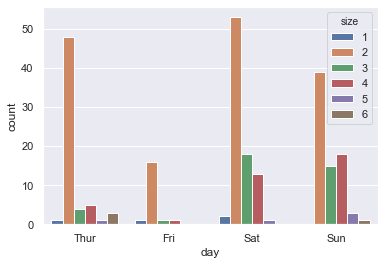

In [15]:
sns.countplot(x='day',hue='size' ,data=tips)

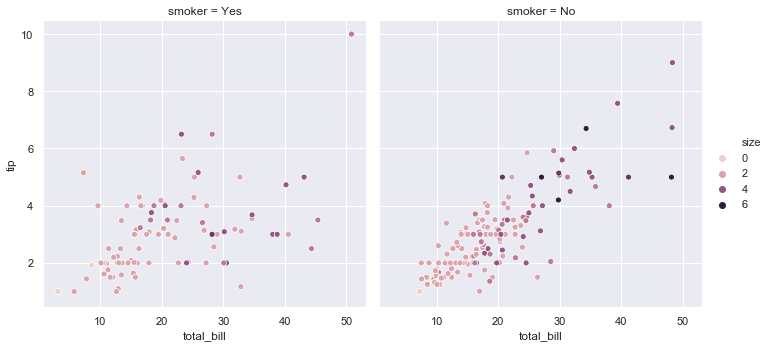

In [16]:
sns.relplot(x='total_bill',y='tip',hue='size',col='smoker',data=tips)

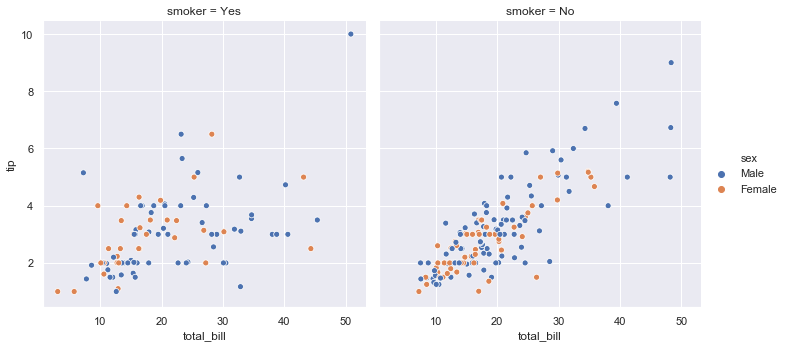

In [17]:
sns.relplot(x='total_bill',y='tip',hue='sex',col='smoker',data=tips)

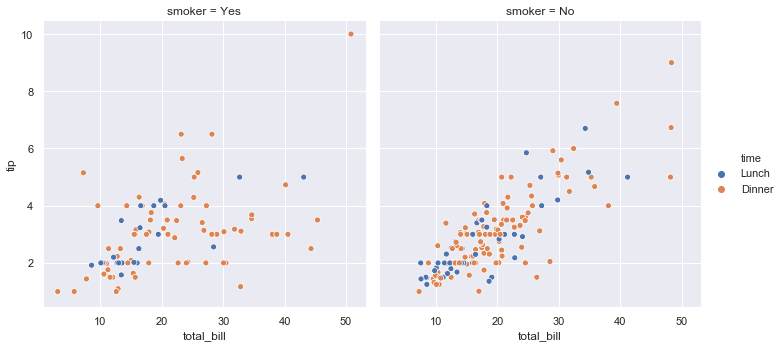

In [18]:
sns.relplot(x='total_bill',y='tip',hue='time',col='smoker',data=tips)

## Analysis of Tips Dataset

A strong correlation can be demonstrated between total bill and tip.  As a result underlying relationships can be investigated. The plots establish the strength of the relationship but it is quite feasible that the tip amount actually interacts with another (unconsidered) variable e.g. ambience.

It is also should be remembered that there is a time interval between a cause and effect e.g. the waiter did not meet expectations e.g. forgot a drinks order but the customer let it go when paying.

Observations:
- Everyone left a tip
- Friday lunch is highest tip
- Split of gender is not given
- Smoking and non smoking section - non smokers may have had to move to a smoking section and vice versa due to non availability

Do smokers / non smokers tip differently or if size of group is influences amount?   We have not been provided with number of tables, however if customers were moved to a section that did not meet their requirements, this could be a factor.
Dissect the variable to discover interesting relationships.


Service is subjective and relates to an overall experience. The controls in the dataset are the waiter and the restaurant. It is assumed that the same quality of food and service is provided to all customers which is difficult to achieve due to a variety of qualitative factors e.g. chef that is on duty, cleaning staff etc.

4 columns are categories/objects:

sex - Male/Female
smoker - Yes or No
day - Thursday through to Sunday
time - lunch or dinner

3 columns are numeric:

total_bill (float)
tip (float)
size (integer)

Sex is not definitive as the breakdown of parties is not given.  Likewise with smokers there may be a combination of smokers and non smokers at each table. Also is the restaurant was busy non smokers may have had to move to the smoking section and vice versa. 
Day and time are definitive
Total Bill is definitive
Tip is definitive
Size is definitive

Therefore the only variables that we can look to for analysis are day, time, bill, tip and size.